**Prediksi Risiko Penyakit Jantung Menggunakan Pengklasifikasi
Pembelajaran Mesin** 

**1. PENDAHULUAN**

Penyakit Jantung atau penyakit kardiovaskular(CVD) merupakan salah satu penyakit berbahaya yang dapat menyebabkan kematian. Penyakit ini adalah salah satu penyakit paling mematikan dan kronis, yang menyebabkan jumlah kematian tertinggi di dunia. Dari statistik terbaru yang dilaporkan oleh World Health Organization (WHO), sekitar 20,5 juta orang meninggal setiap tahun karena penyakit jantung, yaitu sekitar 31,5% dari semua kematian secara global. Diperkirakan juga jumlah kematian tahunan akan meningkat menjadi 24,2 juta pada tahun 2030. Sekitar 85% kematian akibat penyakit kardiovaskular yang disebabkan oleh serangan jantung dan stroke

Penyebab utama dari serangan jantung adalah ketika aliran darah ke jantung tersumbat karena penumpukan plak di arteri. Sedangkan, Stroke disebabkan oleh adanya bekuan darah di arteri dalam otak ,sehingga  memotong sirkulasi darah ke otak . Sebagian besar penyakit jantung disebabkan ketika jantung tidak mampu menyediakan suplai darah yang cukup ke bagian-bagian tubuh . Ini menghasilkan gejala awal seperti detak jantung tidak teratur, sesak napas, ketidaknyamanan pada dada, pusing mendadak, mual, kaki bengkak, dan keringat dingin. Prediksi yang akurat dan diagnosis penyakit jantung yang tepat pada waktunya sangat diperlukan untuk meningkatkan tingkat kelangsungan hidup pasien.  Beberapa hal yang dapat mengurangi tingkat kematian adalah deteksi dini tanda-tanda dan perubahan gaya hidup, seperti aktivitas fisik, menghindari merokok, dan pemeriksaan medis yang tepat oleh dokter 

 Masih  sulit bagi para ahli medis untuk secara akurat memprediksi penyakit jantung pasien, di mana mereka dapat memprediksi dengan akurasi hingga 67% karena pada saat ini, diagnosis penyakit apa pun dilakukan berdasarkan gejala serupa yang diamati dari pasien yang didiagnosis sebelumnya . Oleh karena itu, bidang medis membutuhkan sistem untuk prediksi akurat penyakit jantung. Hal ini dapat dicapai dengan memanfaatkan sejumlah besar data pasien yang tersedia di sektor medis, bersama dengan algoritma pembelajaran mesin 

Dokter dan ilmuwan sama-sama telah beralih ke teknik pembelajaran mesin (ML) untuk mengembangkan alat skrining dan ini karena keunggulan mereka dalam pengenalan pola dan klasifikasi dibandingkan dengan pendekatan statistik tradisional lainnya.

Tujuan utama dari penelitian ini adalah untuk menerapkan sistem prediksi medis terbaik untuk diagnosis penyakit jantung pada tahap awal menggunakan teknik pembelajaran mesin. Dalam penelitian ini, algoritma pengklasifikasi yang digunakan adalah Logistic regression, K Nearest Neighbors (KNN), Support  Vector Machine (SVM), Naïve Bayes, Decision Tree dan Random Forest.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**2.DATASET**

Data di dapatkan dari https://archive.ics.uci.edu/ml/datasets/heart+disease.  Dataset ini memberikan informasi pasien dengan mencakup sebanyak 1025 catatan dan 14 atribut seperti yang tertera  Dibawah ini.



 Deskripsi atribut untuk dataset jantung 
	
Usia : 	numerik	34 hingga 76

sex	: Jenis kelamin	nominal(0 = wanita
1 = laki-laki)

Cp (chest pain): Jenis nyeri dada	nominal(0 = tanpa gejala
1 = angina tipikal 
2 = angina non tipikal
3 = nyeri non- angina)

tretbps: Tekanan darah dalam mm Hg saat masuk rumah sakit	nominal	(94 - 180)

chol: Kolestrol serum dalam mg /dL	 numerik(149 - 417)

fbs: Gula darah saat puasa >120mg/dL	nominal(0 = salah
1 = benar)

Restecg : Hasil elektrokardiografi saat istirahat	nominal(0 = biasa
1 = abnormalitas gelombang ST-T
2 = hipertrofi ventikel kiri)

thalach: Detak jantung maksimum yang tercapai	numerik(106 – 184)

exang: Angina yang disebabkan oleh olahraga	nominal(0 = tidak
1 = ya)

oldpeak: Depresi ST yang disebabkan oleh olahraga relative 	numerik	(0  - 6.2)

slope:Lereng segmen ST 	nominal	(0 = menanjak
1 = datar
2 =Miring ke bawah )

ca:Jumlah pembuluh utama yang ditandai dengan fluoroskopi	nominal(0 – 3)

thal: Status hati	nominal(3 = biasa
6 =cacat permanen
7 = cacat yag dapat disembuhkan)

target: Atribut prediksi	nominal	(0 = tidak ada resiko
1 = ada resiko)


In [54]:
df = pd.read_csv("/content/heart.csv")

In [55]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**3. Eksplorasi Data**

**1. pra- pemrosesan data**

memeriksa variabel yang hilang

In [56]:
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


 Distribusi Data

Di sini saya ingin mendapatkan wawasan statistik penting dari data dan hal-hal yang saya periksa adalah distribusi atribut yang berbeda, korelasi atribut satu sama lain dan variabel target dan saya menghitung peluang dan proporsi penting untuk atribut kategoris.

In [57]:
df.target.value_counts() 

1    526
0    499
Name: target, dtype: int64

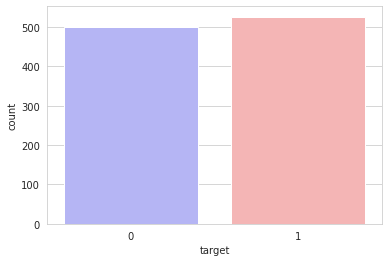

In [58]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [59]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


disini terlihat bahwa sekitar 51,32% pasien memiliki resiko penyakit jantung

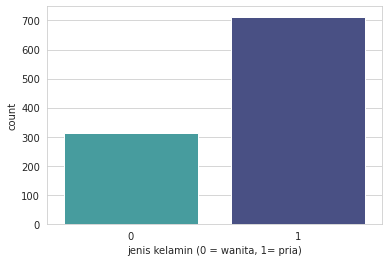

In [62]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("jenis kelamin (0 = wanita, 1= pria)")
plt.show()

disini terlihat bahwa pria memiliki resiko penyakit jantung lebih besar daripada wanita

In [64]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentase dari pasien wanita: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentase dari pasien pria: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentase dari pasien wanita: 30.44%
Percentase dari pasien pria: 69.56%


disini terlihat pria yang memiliki resiko penyakit jantung sebesar 69,56% sedangkan wanita sebesar 30,44%

distribusi data oleh atribut target

In [65]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


distribusi data oleh atribut ages

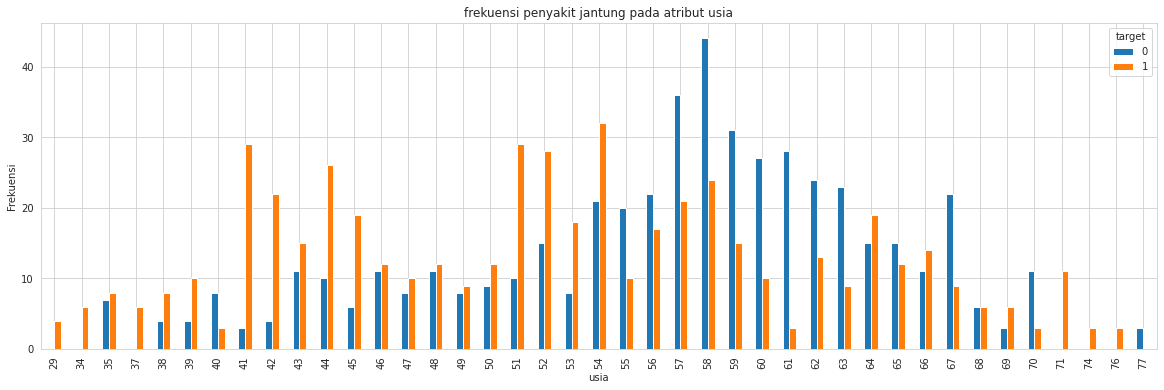

In [75]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('frekuensi penyakit jantung pada atribut usia')
plt.xlabel('usia')
plt.ylabel('Frekuensi')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

distribusi data oleh atribut jenis kelamin

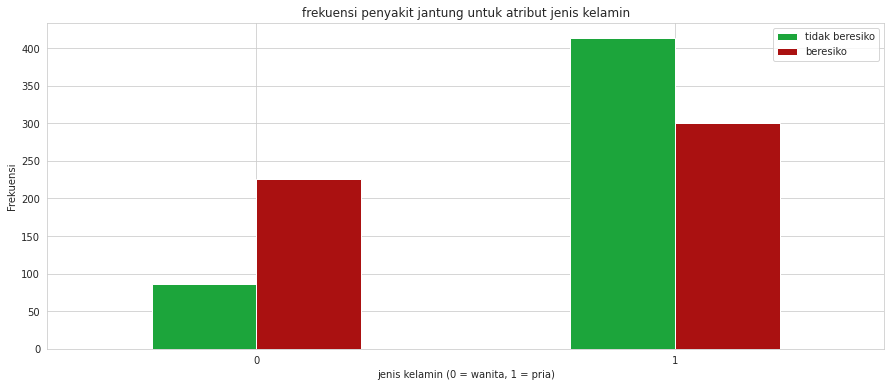

In [74]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('frekuensi penyakit jantung untuk atribut jenis kelamin')
plt.xlabel('jenis kelamin (0 = wanita, 1 = pria)')
plt.xticks(rotation=0)
plt.legend(["tidak beresiko", "beresiko"])
plt.ylabel('Frekuensi')
plt.show()

Distribusi data menurut atribut thalach

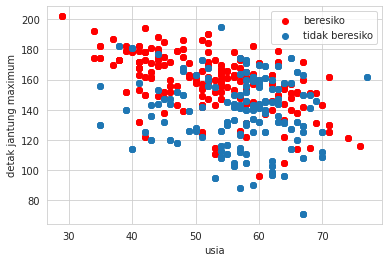

In [72]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["beresiko", "tidak beresiko"])
plt.xlabel("usia")
plt.ylabel("detak jantung maximum")
plt.show()

distribusi data berdasarkan atribut slope

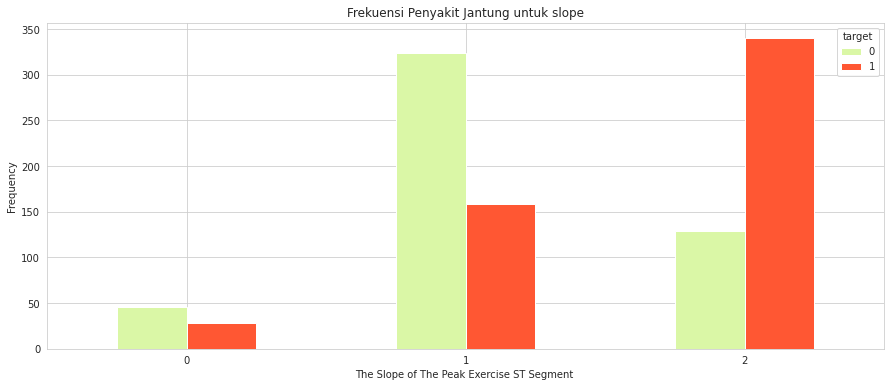

In [76]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Frekuensi Penyakit Jantung untuk slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

disini terlihat bahwa saat posisi lereng miring ke bawah,berarti frekuensi dia beresiko tinggi

Distribusi data berdasarkan FBS

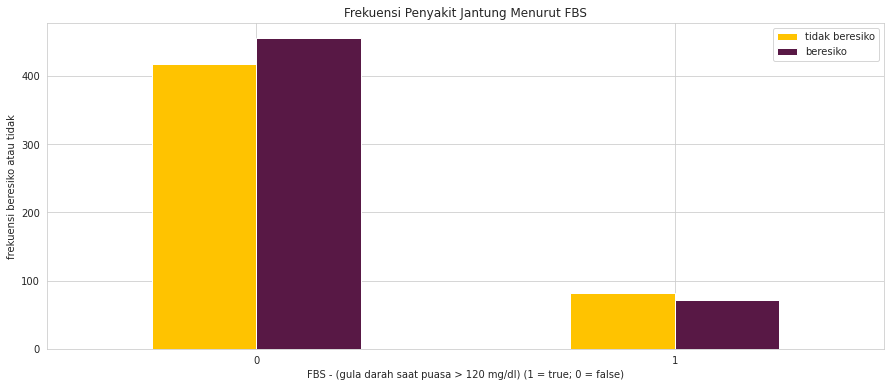

In [78]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Frekuensi Penyakit Jantung Menurut FBS')
plt.xlabel('FBS - (gula darah saat puasa > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["tidak beresiko", "beresiko"])
plt.ylabel('frekuensi beresiko atau tidak')
plt.show()

disini kita lihat bahwa pasien yang tidak puasa dan frekuensi detak jantungnya tinggi berarti dia beresiko penyakit jantung , sedangkan yang berpuasa apabila  frekuensinya rendah berarti dia beresiko penyakit jantung

Distribusi berdasarkan atribut cp

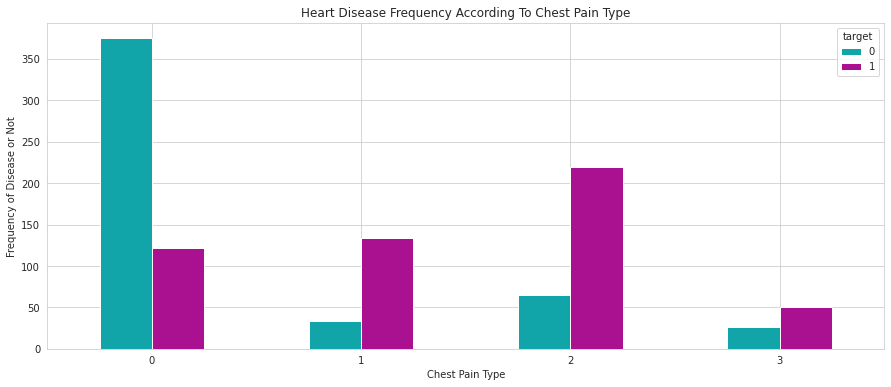

In [79]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Frekuensi Penyakit Jantung Menurut Jenis Nyeri Dada')
plt.xlabel('jenis nyeri dada')
plt.xticks(rotation = 0)
plt.ylabel('frekuensi beresiko atau tidak')
plt.show()

membuat variabel dummy

Karena 'cp', 'thal' dan 'slope' adalah variabel kategorikal, kami akan mengubahnya menjadi variabel dummy.

In [80]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [81]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1,0,0,0,0,0,1,0,0,1,0


In [82]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,0,1,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,1,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,0,1,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,0,1,0,0,0,0,0,1,0,0,1,0


**4.MODEL dan PREDIKSI**

**1.  model regresi logistik**

Salah satu algoritma Pembelajaran Mesin yang paling sederhana dan umum digunakan untuk klasifikasi dua kelas. Mudah diimplementasikan dan dapat digunakan sebagai dasar untuk masalah klasifikasi biner. Ini mengukur hubungan antara variabel dependen kategoris dan satu atau lebih variabel independen dengan memperkirakan probabilitas menggunakan fungsi logistiK

Regresi logistik  memodelkan probabilitas titik data milik kelas tertentu dan menetapkan titik ini label yang sesuai berdasarkan ambang yang dipilih

Kita bisa menggunakan library sklearn atau kita bisa menulis fungsi sendiri. Mari kita berdua. Pertama kita akan menulis fungsi kita setelah itu kita akan menggunakan library sklearn untuk menghitung skor

In [83]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

Normalize Data



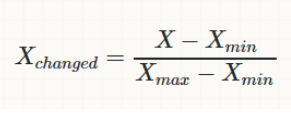

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

saaya akan membagi data saya. 80% dari data kami akan menjadi data latih dan 20% akan menjadi data uji

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [85]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

misalkan bobot = 0.01 and bias = 0.0

In [94]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

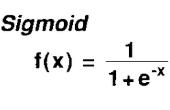

In [95]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

Forward and Backward Propagation


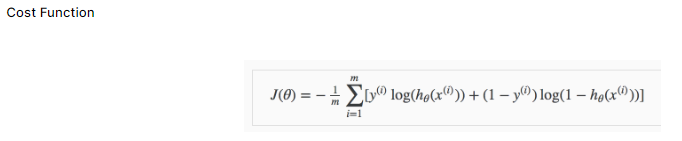

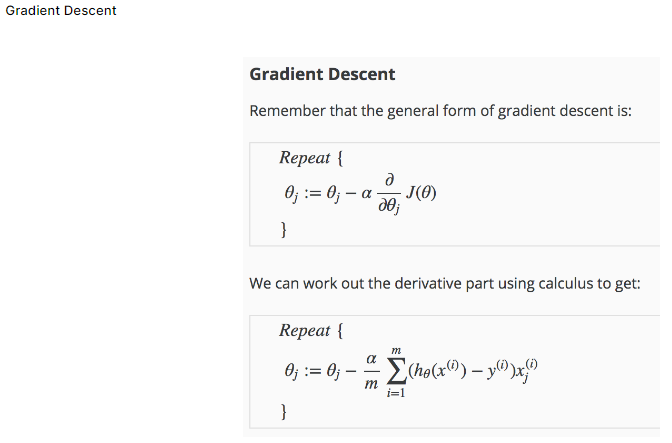

keterangan:

h0(x^i)= y_head

y^i = y_train

x^i = x_train

In [96]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [97]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [102]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [99]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.37214880873836975


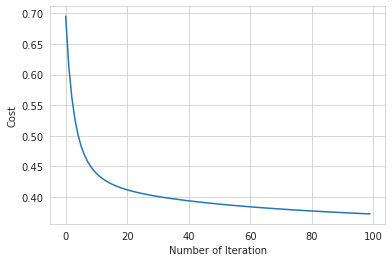

Manuel Test Accuracy: 86.34%


In [100]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)
iteration: 100

Sklearn Logistic Regression

In [101]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.85%


**2.K-Nearest Neighbour (KNN) Classification**

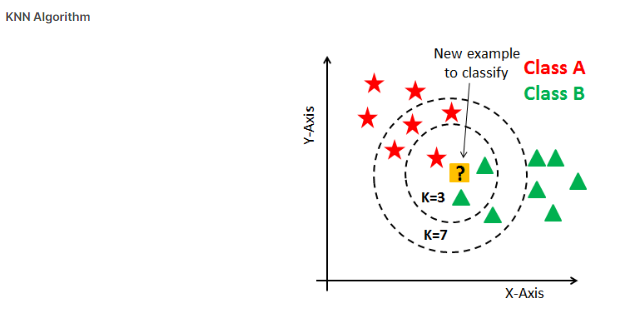

K-nearest neighbor mencoba menentukan kelompok titik data mana dengan melihat titik data di sekitarnya. Misalnya, jika diberikan titik data C, jika mayoritas titik di sekitarnya berada dalam kelompok A, maka kemungkinan besar titik data yang dimaksud akan termasuk dalam kelompok A daripada B, dan sebaliknya.

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 100.00%


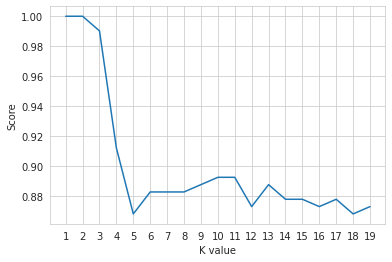

Maximum KNN Score is 100.00%


In [110]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

**3.Support Vector Machine (SVM) Algorithm**

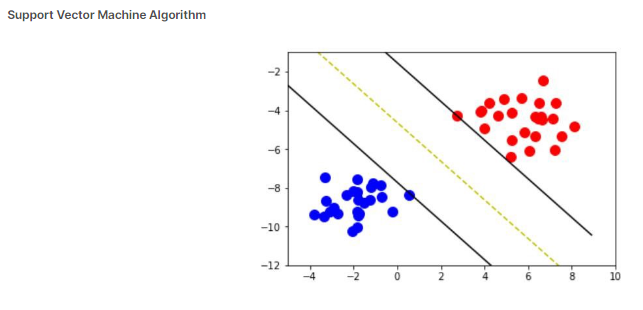

SVM adalah teknik pembelajaran mesin yang  banyak digunakan dalam masalah pengenalan pola dan klasifikasi - saat data Anda memiliki tepat dua kelas. SVM dalam praktiknya membangun hyperplane atau satu set hyperplanes yang paling baik membagi kumpulan data menjadi dua kelas.



Dengan kata lain, diberikan data pelatihan berlabel, algoritme menghasilkan hyperplane optimal yang mengkategorikan contoh baru berdasarkan sisi mana mereka berada dalam kaitannya dengannya. Dalam ruang dua dimensi hyperplane ini adalah garis yang membagi sebuah bidang menjadi dua bagian dimana pada masing-masing kelas terletak pada kedua sisinya.

In [112]:
from sklearn.svm import SVC

In [113]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 91.71%


**4. NAIVE BAYES ALGORITHM**

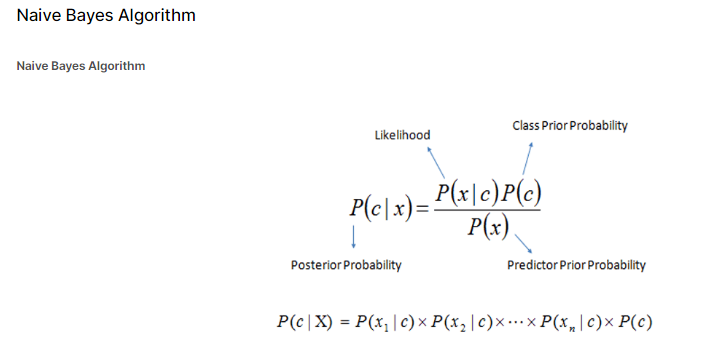

Naive Bayes adalah pengklasifikasi berdasarkan teorema Bayes dan sangat mudah dibuat dan sangat berguna untuk kumpulan data yang sangat besar. itu adalah algoritma probabilistik. dan menghitung probabilitas setiap label untuk objek tertentu dengan melihat karakteristiknya, dan memilih label dengan probabilitas terbesar.

In [114]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 88.29%


**5. Decision Tree Algorithm**

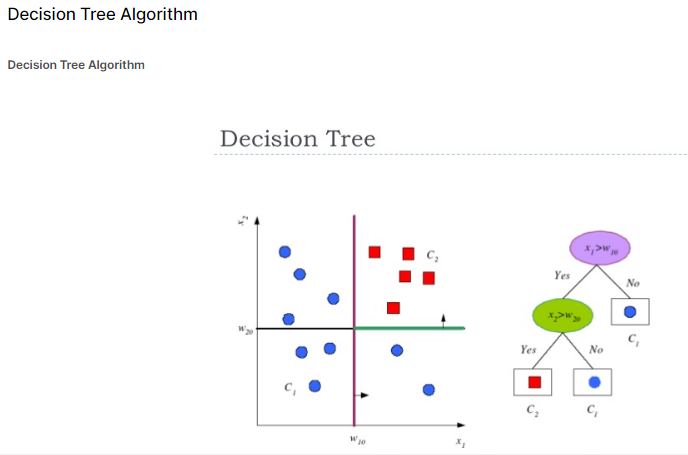

Yang didasarkan pada grafik seperti pohon dengan simpul yang mewakili tempat kita memilih atribut dan mengajukan pertanyaan; tepi mewakili jawaban atas pertanyaan; dan daun mewakili keluaran aktual atau label kelas. Pohon keputusan mengklasifikasikan contoh-contoh dengan mengurutkannya ke bawah pohon dari akar ke beberapa simpul daun, dengan simpul daun memberikan klasifikasi pada contoh. Setiap simpul di pohon bertindak sebagai kasus uji untuk beberapa atribut, dan setiap tepi yang turun dari simpul itu sesuai dengan salah satu kemungkinan jawaban untuk kasus uji. Proses ini bersifat rekursif dan berulang untuk setiap sub-pohon yang berakar pada node baru.

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 100.00%


**6.Random Forest Classification**

Random Forest membuat pohon keputusan atas sampel data yang dipilih secara acak, mendapatkan prediksi dari setiap pohon dan memilih solusi terbaik melalui voting. Ini juga memberikan indikator yang cukup bagus tentang pentingnya fitur dan menghindari overfitting. Random Forest menggunakan rata-rata untuk meningkatkan akurasi prediksi dan kontrol over-fitting dan dapat menangani sejumlah besar fitur, dan berguna untuk memperkirakan variabel mana yang penting dalam data dasar yang sedang dimodelkan.



In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 100.00%


PERBANDINGAN AKURASI

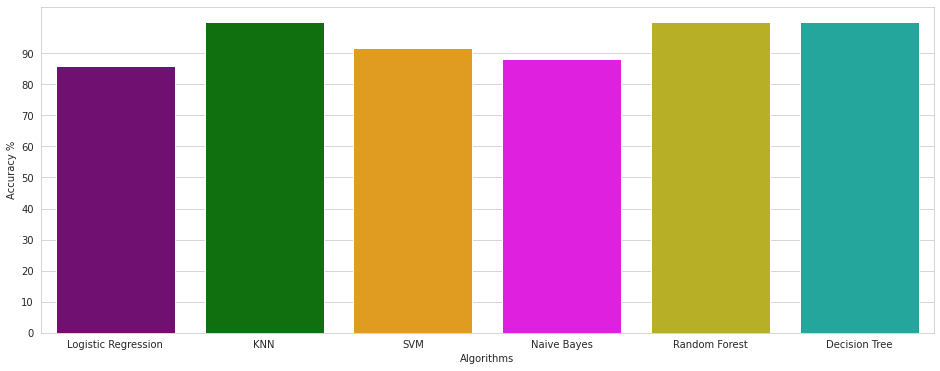

In [121]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()


**7.Confusion Matrix**

Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. Ada empat istilah yang merupakan representasi hasil proses klasifikasi pada confusion matrix yaitu True Positif, True Negatif, False Positif, dan False Negatif. 

In [117]:
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [118]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

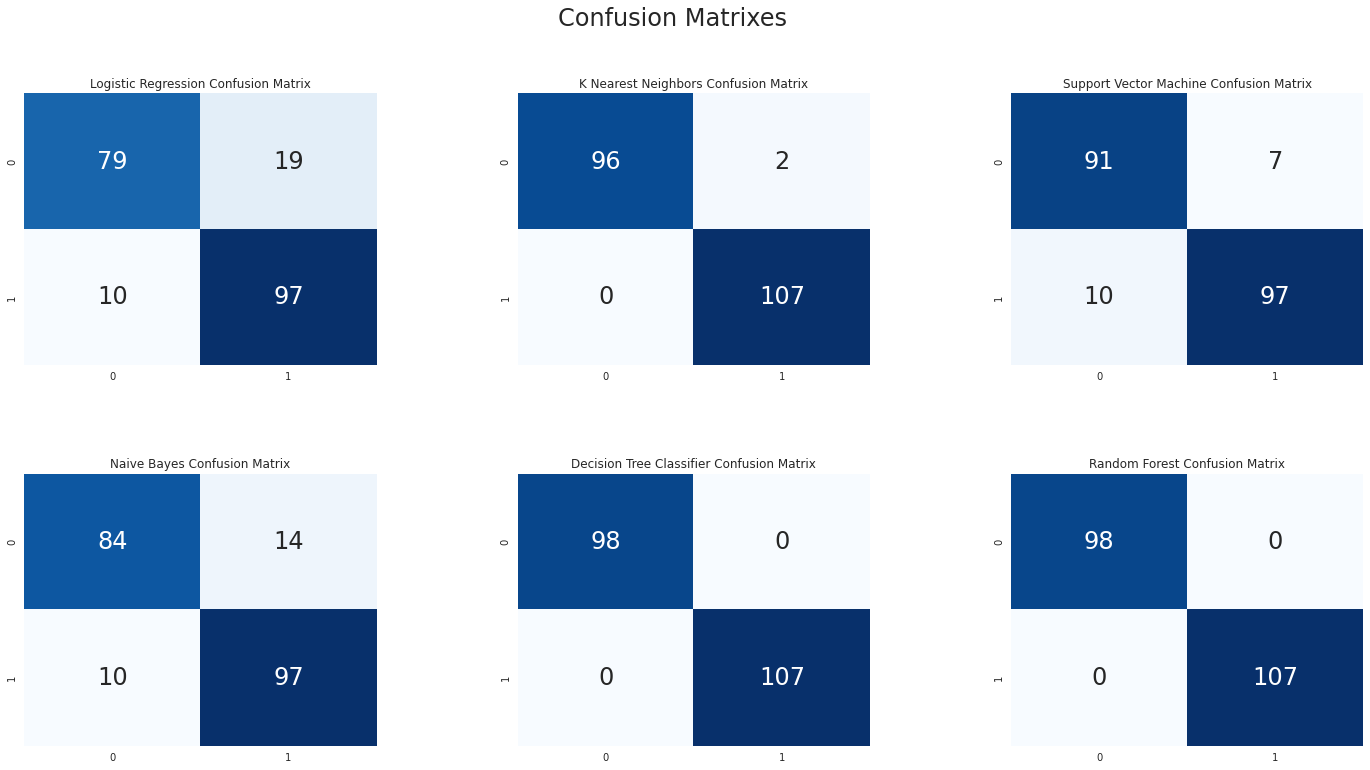

In [104]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

**KESIMPULAN**
